## Importing required  libraries

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
df = pd.read_csv ("car_data.csv")
df.head ()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [20]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## Univariate Analysis & Handling outliers

Text(0.65, 1.25, 'Car Price Prediction Univariate plot')

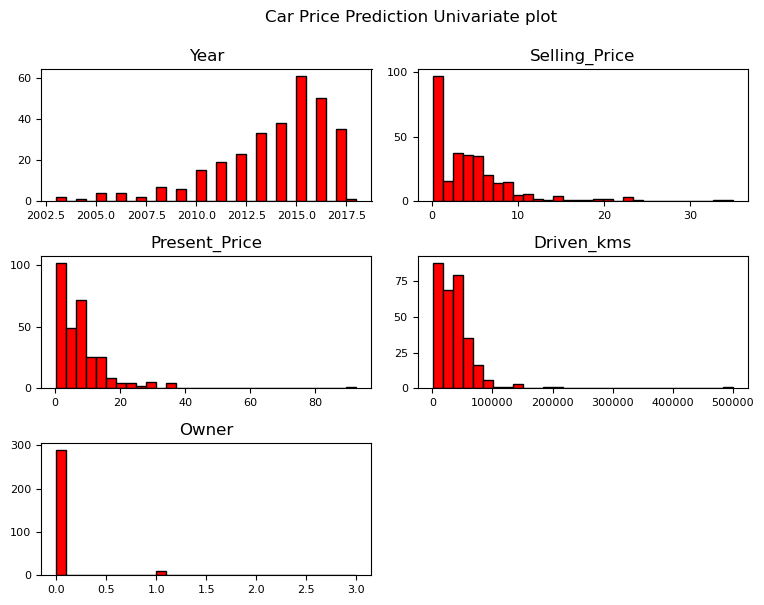

In [21]:
df.hist (bins = 30, color = "red", edgecolor = "black", linewidth = 1,
        xlabelsize = 8, ylabelsize = 8, grid = False)

plt.tight_layout (rect = (0, 0, 1.2, 1.2))

plt.suptitle ("Car Price Prediction Univariate plot", x = 0.65, y = 1.25,
              fontsize = 12)

### Observation
outliers in:
- present_price
- Driven_Kms

In [22]:
def p_outliers (df, col, uv_f = 3, lv_f = 0.3):
    uv = np.percentile (df[col], [99]) * uv_f
    lv = np.percentile (df[col], [1]) * lv_f
    
    return f"upper_limit: {uv} --- lower_limit:{lv}"

In [23]:
## Driven_kms
p_outliers (df, "Driven_kms")

'upper_limit: [426000.] --- lower_limit:[360.]'

In [24]:
df.Driven_kms[(df.Driven_kms >= 426000)] = 426000

C:\Users\hp\AppData\Local\Temp\ipykernel_15840\2307008315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Driven_kms[(df.Driven_kms >= 426000)] = 426000


## Handling categorical variables  & multivariate analysis

In [ ]:
# deleting unwanted column
del df["Car_Name"]

In [38]:
df = pd.get_dummies (df, drop_first = True)

In [39]:
df.shape

(301, 9)

Text(0.5, 1.0, 'car price multivariate plot')

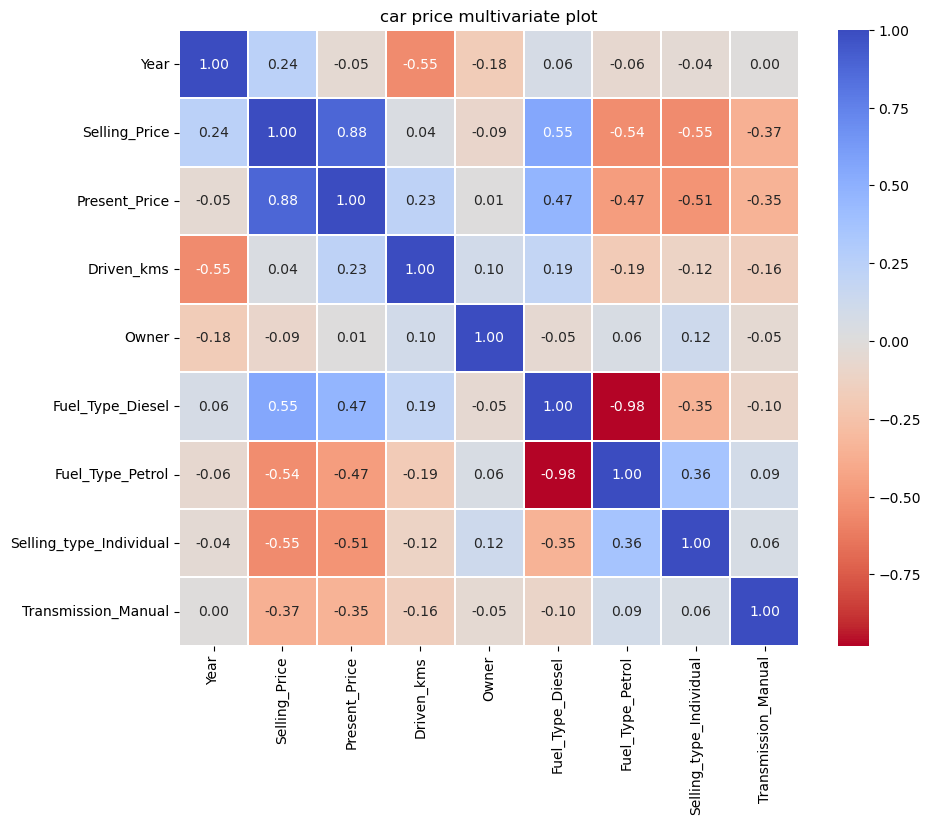

In [49]:
# multivariate analysis
corr = df.corr ()
plt.figure (figsize = (10, 8))
sns.heatmap (corr, annot = True, fmt = ".2f", cmap = "coolwarm_r", linewidth = 0.2)
plt.title ("car price multivariate plot", fontsize = 12)

## Splitting our Dataset

In [41]:
# defining our dependent and independent variables
x = df.drop ("Selling_Price", axis = 1)
y = df["Selling_Price"]

# splitting our datset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.8, random_state = 42)

## Modelling

In [42]:
model = LinearRegression ().fit (x_train, y_train)

## making predictions

In [47]:
y_pred = model.predict (x_test)

df_test = pd.DataFrame({"Actual_Price": y_test[:20], "Pred_Price": model.predict (x_test)[:20]})
df_test

,Actual_Price,Pred_Price
177,0.35,2.939444
289,10.11,8.194832
228,4.95,6.458917
198,0.15,-1.403195
60,6.95,9.093366
9,7.45,7.417678
118,1.10,1.322279
154,0.50,0.867711
164,0.45,1.359009
33,6.00,7.497399


In [45]:
r2_score (y_test, model.predict (x_test))

0.849836939561189

### Comparing our predicted and actaul price using a line plot

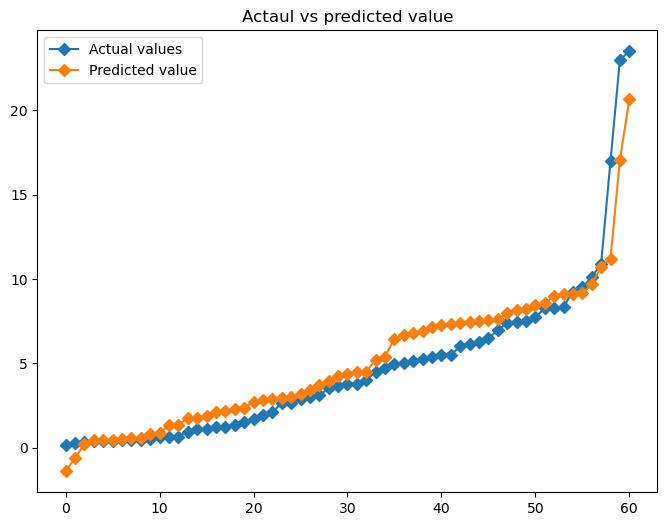

In [50]:
plt.figure (figsize = (8,6))
plt.plot (sorted (y_test), label = "Actual values", marker = "D")
plt.plot (sorted (y_pred), label = "Predicted value", marker = "D")
plt.title ("Actaul vs predicted value")

plt.legend ()
plt.show ()